## CMTH642 - Data Analytics: Advanced Methods
### Assignment 3


Assignment 3 is worth 10% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


### Question 1
Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

The following questions will be answered for wine_data_all.



In [43]:
import pandas as pd

wine_white = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

white_wine_data = pd.read_csv(wine_white, sep=';')

red_wine_data = pd.read_csv(wine_red, sep=';')

# Add a new column 'wine_type' to each dataset to distinguish the wines type
white_wine_data['wine_type'] = 'white'
red_wine_data['wine_type'] = 'red'

# Concatenate the two datasets vertically to join them
wine_data_all = pd.concat([white_wine_data, red_wine_data], ignore_index=True)

print(wine_data_all.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6   

### Question 2
Check the data types of the attributes. (2 points)

In [44]:
print(wine_data_all.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [45]:
# Checking for missing values in the joined dataset
missing_values = wine_data_all.isnull().sum()

# Counting the total number of missing values
total_missing = missing_values.sum()

print("Total of missing values =", total_missing)


Total of missing values = 0


### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [46]:
# Calculate the correlation matrix for the attributes other than "Quality"
correlation_matrix = wine_data_all.drop("quality", axis=1).corr()

print(correlation_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidit

<ipython-input-46-f438775be978>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wine_data_all.drop("quality", axis=1).corr()


### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

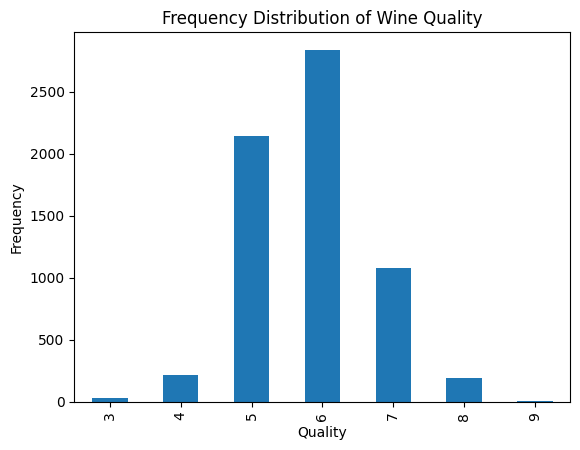

In [47]:
import matplotlib.pyplot as plt

wine_data_all["quality"].value_counts().sort_index().plot(kind="bar")

plt.title("Frequency Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")

plt.show()


### Question 6
Reduce the levels of rating for quality to two levels, Pass and Fail. Assign the levels 3, 4, and 5 to level Fail; and 6, 7, 8, and 9 to level Pass. (10
points)

In [48]:
quality_mapping = {3: "Fail", 4: "Fail", 5: "Fail", 6: "Pass", 7: "Pass", 8: "Pass", 9: "Pass"}

# Replace the quality levels with the reduced levels
wine_data_all["quality"] = wine_data_all["quality"].replace(quality_mapping)

print(wine_data_all["quality"].value_counts())


Pass    4113
Fail    2384
Name: quality, dtype: int64


### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [49]:
numeric_attributes = wine_data_all.select_dtypes(include=['float64', 'int64'])

# Normalize the numeric attributes using the formula (x - min(x)) / (max(x) - min(x))
normalized_data = (numeric_attributes - numeric_attributes.min()) / (numeric_attributes.max() - numeric_attributes.min())

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_attributes.columns)

print(normalized_df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol  
0  0.115942  
1  0.217391  
2  0.304348  


### Question 8
Divide the dataset to training and test sets. (10 points)

In [50]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = wine_data_all.drop("quality", axis=1)
y = wine_data_all["quality"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (5197, 12) (5197,)
Test set shape: (1300, 12) (1300,)


### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wine_data_all.drop("quality", axis=1)
y = wine_data_all["quality"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns for one-hot encoding
categorical_cols = ['wine_type']

# Perform one-hot encoding on categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7453846153846154


### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = wine_data_all.drop("quality", axis=1)
y = wine_data_all["quality"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a label encoder to convert the "wine_type" column to numeric values
label_encoder = LabelEncoder()
X_train["wine_type_encoded"] = label_encoder.fit_transform(X_train["wine_type"])

# Remove the original "wine_type" column from the training data
X_train_encoded = X_train.drop("wine_type", axis=1)


column_transformer = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), ["wine_type_encoded"])],
    remainder="passthrough"
)

X_train_encoded = column_transformer.fit_transform(X_train_encoded)

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Fitting the model to the training data
knn.fit(X_train_encoded, y_train)

# Apply the label encoder and column transformer to the test data
X_test["wine_type_encoded"] = label_encoder.transform(X_test["wine_type"])
X_test_encoded = column_transformer.transform(X_test.drop("wine_type", axis=1))

# Make predictions on the test data
y_pred = knn.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Pass")
recall = recall_score(y_test, y_pred, pos_label="Pass")
f1 = f1_score(y_test, y_pred, pos_label="Pass")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.6815384615384615
Precision: 0.7391304347826086
Recall: 0.7764423076923077
F1-Score: 0.7573270808909731


### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [53]:
from sklearn.metrics import confusion_matrix

# Fit the model to the training data for Logistic Regression
logreg.fit(X_train_encoded, y_train)

# Making predictions on the test data for Logistic Regression
y_pred_logreg = logreg.predict(X_test_encoded)

# Fit the model to the training data for KNN
knn.fit(X_train_encoded, y_train)

# Make predictions on the test data for KNN
y_pred_knn = knn.predict(X_test_encoded)

# Calculating the confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix - Logistic Regression:")
print(cm_logreg)

print("\nConfusion Matrix - KNN:")
print(cm_knn)


Confusion Matrix - Logistic Regression:
[[272 196]
 [137 695]]

Confusion Matrix - KNN:
[[240 228]
 [186 646]]


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred, pos_label="Pass")
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred, pos_label="Pass")
print("Recall:", recall)

# Explanation:
# Accurancy: is approximately 70.23%, means that around 70.23% of the samples in the test set were correctly classified by the model.
# Precision: is approximately 74.92%, iindicates that among the samples predicted as "Pass" (positive class), around 74.92% of them were actually true positives,
# while the remaining percentage could be false positives.
# Recall: the sensitivity of the model is approximately 80.41%, suggests that out of all the true positive samples in the test set, around 80.41%
# of them were correctly identified by the model. It indicates the model's ability to capture the positive samples.

Accuracy: 0.6815384615384615
Precision: 0.7391304347826086
Recall: 0.7764423076923077


This is the end of Assignment 3

Ceni Babaoglu, PhD